<a href="https://colab.research.google.com/github/twiddling-thumbs/Anomaly-detector-for-an-IDS/blob/main/SWaT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Welcome!')


Welcome!


In [ ]:
# file_path_swat = '/content/SWaT_Dataset_Attack_v0.xlsx'


df = pd.read_excel('SWaT_Dataset_Attack_v0.xlsx')
df.head(10)


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
4,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
5,28/12/2015 10:00:04 AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
6,28/12/2015 10:00:05 AM,2.609294,523.8673,2,2,1,262.0161,8.394514,328.6337,2.44411,...,2,1,250.753,1.649953,189.5027,0.000128,1,1,1,Normal
7,28/12/2015 10:00:06 AM,2.637158,524.1028,2,2,1,262.0161,8.394514,328.6337,2.44411,...,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1,Normal
8,28/12/2015 10:00:07 AM,2.652211,524.2206,2,2,1,262.0161,8.394514,328.6337,2.441803,...,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1,Normal
9,28/12/2015 10:00:08 AM,2.655735,524.4954,2,2,1,262.0161,8.394514,328.6337,2.441803,...,2,1,250.9132,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
# file_path_swat = '/content/SWaT_Dataset_Attack_v0.xlsx'


df = pd.read_excel('SWaT_Dataset_Normal_v0.xlsx')
df.head(10)


In [ ]:
df.rename(columns={'Normal/Attack': 'attack'}, inplace=True)

In [ ]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,attack
1,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
4,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
5,28/12/2015 10:00:04 AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the first row containing column names
# df = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=None)

# Use the first row as column names
df.columns = df.iloc[0]

# Drop the first row (since it's now used as column names)
df = df[1:]

# Display the DataFrame with updated column name
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
4,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
5,28/12/2015 10:00:04 AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'Normal' else 1)
# test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
# test_df['attack_flag'] = test_attack

# view the result
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,attack,attack_flag
1,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal,0
2,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal,0
3,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal,0
4,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal,0
5,28/12/2015 10:00:04 AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal,0


In [ ]:
from sklearn.model_selection import train_test_split
x = df[['FIT101','LIT101','AIT202','AIT203']]
y = df['attack_flag']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(314943, 4)
(314943,)


In [ ]:
# model for the binary classification
binary_model = LogisticRegression()
binary_model.fit(x_train, y_train)
binary_predictions = binary_model.predict(x_test)

# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

0.9226825509720247

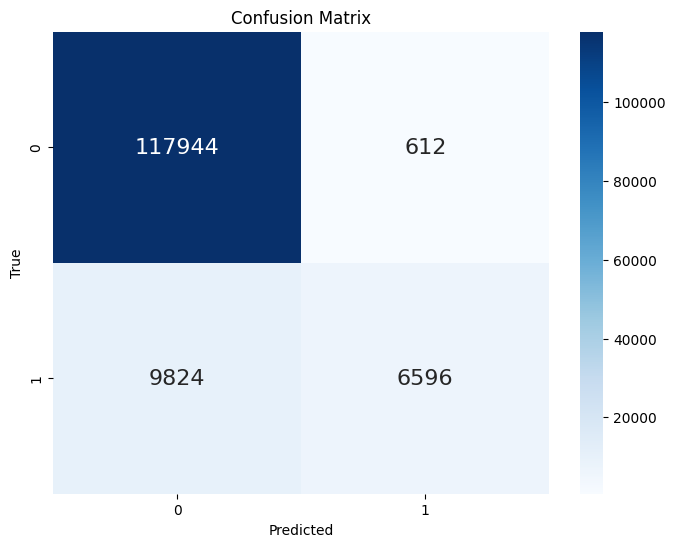

In [ ]:
cm = confusion_matrix(y_test, binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# model for the binary classification
rF = RandomForestClassifier()
rF.fit(x_train, y_train)
rF_predictions = rF.predict(x_test)

# calculate and display our base accuracty
base_rf_score = accuracy_score(rF_predictions,y_test)
base_rf_score

0.9976958866761498

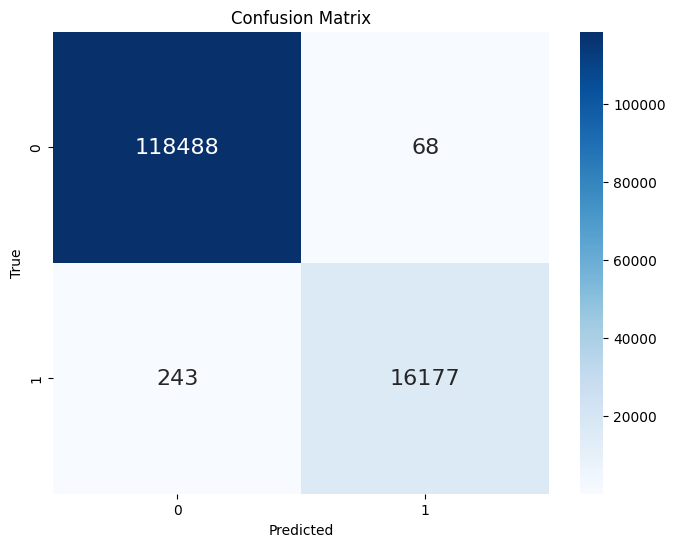

In [ ]:
cm = confusion_matrix(y_test, rF_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()